1.1

In [ ]:
import numpy as np
def qZ(x, y):
    return ( x - 2 * y - 3 ) / ( x * x + 3 * y * y + 1)
def qSumZ(Z):
    return sum (Z)
def exchangeScheme(oldX, oldY, sortedId): #обмен генами как на картинке
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X, Y
# возврат лучших хромосом
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId
# вся эволюция в 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results
# кусочек этой эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for id, value in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z
#лирика
X = [-4, -2, 0, 2]
Y = [-1, 1, 0, -2]
results = evoSteps(X, Y)
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max Z: {max(qualityArrZ)}')


max_1_step: 1.3707158161093673e-06
max_2_step: 4.847134259746105e-06
max_3_step: 7.11976879253949e-06
max_4_step: 1.2536299151329501e-05
max Z: 4.763346834310955e-06


1.2

Лучший выбранный маршрут: [1, 5, 4, 3, 6, 2, 1]
Длина лучшего маршрута: 61
Длины всех рассмотренных маршрутов: [106, 85, 85, 61, 61]


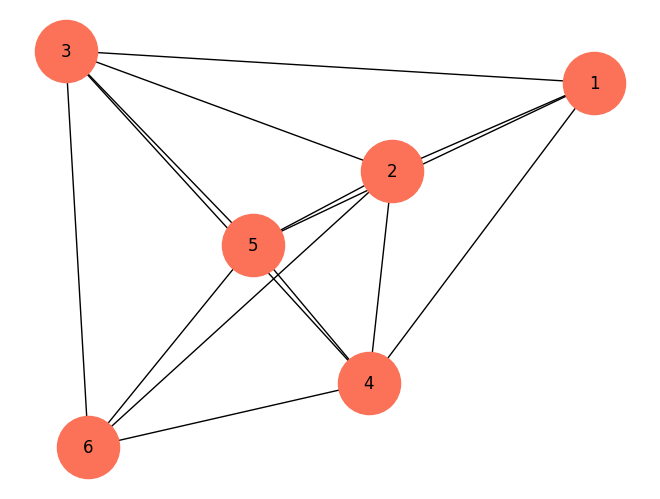

In [ ]:
import networkx as nx
from math import e
import random
distances = [(1, 2, 17), (1, 3, 39), (1, 4, 32), (1, 5, 28), (2, 3, 24), (2, 4, 18), (2, 5, 13), (2, 6, 35), (3, 4, 43), (3, 5, 25), (3, 6, 33), (4, 5, 16), (4, 6, 20), (5, 6, 24)]
V = [1, 5, 2, 6, 3, 4, 1] #маршрут
Z = [(3, 4), (4, 3), (5, 2), (6, 2)]
P = [78, 79, 25, 82]
T = 100
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)
# функция изменения температуры
def reduceTemp(prevT):
    return 0.5 * prevT
# функция пересчета длины маршрута
def routeLength(arr, distances):
    return sum([d[2] for d in distances if (d[0], d[1]) in zip(arr, arr[1:])])
# функция перестановки вершин
def routeOneReplacement(arr, z):
    arr[z[0]], arr[z[1]] = arr[z[1]], arr[z[0]]
    return arr
# перестановки маршрута
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
# выбор наилучшего пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        delta = newS - sumLength
        if delta > 0:
            p = probability(delta, T)
            if random.uniform(0, 100) < p:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        arrSum.append(sumLength)
        T = reduceTemp(T)
    return V, arrSum
# визуал
def drawRouteGraph(distances, bestRoute):
    graph = nx.Graph()
    graph.add_weighted_edges_from(distances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)
